In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

albany au
ushuaia ar
barrow us
severo-kurilsk ru
port lincoln au
sitka us
katherine au
airai pw
kieta pg
rikitea pf
yellowknife ca
salalah om
faya td
clyde river ca
at-bashi kg
mataura pf
nemuro jp
saskylakh ru
ribeira grande pt
zhuozhou cn
hobart au
pontianak id
puerto ayora ec
hermanus za
qaanaaq gl
adrar dz
ushuaia ar
jamestown sh
dingle ie
dayong cn
castro cl
buraydah sa
den helder nl
kapaa us
springbok za
busselton au
leningradskiy ru
mataura pf
barrow us
ushuaia ar
havelock us
meulaboh id
new norfolk au
lorengau pg
san patricio mx
mar del plata ar
poum nc
tiksi ru
bredasdorp za
portland au
ulaangom mn
touros br
tabou ci
hithadhoo mv
zyryanka ru
tuktoyaktuk ca
abu dhabi ae
khatanga ru
solnechnyy ru
cherskiy ru
cidreira br
san quintin mx
codajas br
bredasdorp za
bilibino ru
khani ru
ruatoria nz
bredasdorp za
ponta do sol cv
sibolga id
ancud cl
port macquarie au
punta arenas cl
vaini to
ushuaia ar
ponta do sol pt
geraldton ca
taolanaro mg
yazman pk
kodiak us
hobyo so
bambous virieux

guerrero negro mx
olafsvik is
havre-saint-pierre ca
astipalaia gr
albany au
busselton au
auki sb
rikitea pf
hermanus za
bluff nz
hermanus za
ushuaia ar
busselton au
tura ru
chokurdakh ru
ushuaia ar
kyabe td
chokurdakh ru
honiara sb
taolanaro mg
amderma ru
majene id
taolanaro mg
hermanus za
illoqqortoormiut gl
vaini to
moose factory ca
hermanus za
barentsburg sj
ostrovnoy ru
birao cf
ushuaia ar
butaritari ki
punta arenas cl
klaksvik fo
atuona pf
avarua ck
punta arenas cl
saint-philippe re
greystones ie
allapalli in
east london za
ushuaia ar
cherskiy ru
saskylakh ru
turukhansk ru
punta arenas cl
kununurra au
hambantota lk
denpasar id
dingle ie
kjollefjord no
vestmannaeyjar is
amderma ru
barentsburg sj
codrington ag
kitimat ca
barrow us
amderma ru
kaitangata nz
clyde river ca
bowen au
chuy uy
hamilton bm
pathein mm
kloulklubed pw
husavik is
cidreira br
port elizabeth za
joao pinheiro br
barrow us
rikitea pf
iquitos pe
puerto ayora ec
ardistan ir
kaitangata nz
bredasdorp za
albany au
ixtla

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | albany
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | barrow
Processing Record 4 of Set 13 | severo-kurilsk
Processing Record 5 of Set 13 | port lincoln
Processing Record 6 of Set 13 | sitka
Processing Record 7 of Set 13 | katherine
Processing Record 8 of Set 13 | airai
Processing Record 9 of Set 13 | kieta
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | yellowknife
Processing Record 12 of Set 13 | salalah
Processing Record 13 of Set 13 | faya
Processing Record 14 of Set 13 | clyde river
Processing Record 15 of Set 13 | at-bashi
Processing Record 16 of Set 13 | mataura
Processing Record 17 of Set 13 | nemuro
Processing Record 18 of Set 13 | saskylakh
Processing Record 19 of Set 13 | ribeira grande
Processing Record 20 of Set 13 | zhuozhou
City not found. Skipping...
Processing Record 21 of Set 13 | hobart
Processing Record 22 of Set 13 | pontian

Processing Record 37 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 16 | lavrentiya
Processing Record 39 of Set 16 | rawson
Processing Record 40 of Set 16 | oistins
Processing Record 41 of Set 16 | sur
Processing Record 42 of Set 16 | kruisfontein
Processing Record 43 of Set 16 | luang prabang
Processing Record 44 of Set 16 | arauco
Processing Record 45 of Set 16 | cape town
Processing Record 46 of Set 16 | iqaluit
Processing Record 47 of Set 16 | edson
Processing Record 48 of Set 16 | kabare
Processing Record 49 of Set 16 | haines junction
Processing Record 50 of Set 16 | cayenne
Processing Record 1 of Set 17 | kongolo
Processing Record 2 of Set 17 | anar darreh
City not found. Skipping...
Processing Record 3 of Set 17 | lakes entrance
City not found. Skipping...
Processing Record 4 of Set 17 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 17 | amderma
City not found. Skipping...
Processing Record 6 of Set 17 | sola
Processing

Processing Record 14 of Set 20 | saint-pierre
Processing Record 15 of Set 20 | nouadhibou
Processing Record 16 of Set 20 | hecun
Processing Record 17 of Set 20 | grakhovo
Processing Record 18 of Set 20 | marawi
Processing Record 19 of Set 20 | hamilton
Processing Record 20 of Set 20 | safwah
City not found. Skipping...
Processing Record 21 of Set 20 | presidencia roque saenz pena
Processing Record 22 of Set 20 | eureka
Processing Record 23 of Set 20 | scarborough
Processing Record 24 of Set 20 | doha
Processing Record 25 of Set 20 | carman
Processing Record 26 of Set 20 | bintulu
Processing Record 27 of Set 20 | bengkulu
Processing Record 28 of Set 20 | jiddah
City not found. Skipping...
Processing Record 29 of Set 20 | si racha
Processing Record 30 of Set 20 | la asuncion
Processing Record 31 of Set 20 | vire
Processing Record 32 of Set 20 | guerrero negro
Processing Record 33 of Set 20 | havre-saint-pierre
Processing Record 34 of Set 20 | astipalaia
City not found. Skipping...
Proces

Processing Record 47 of Set 23 | pietersburg
Processing Record 48 of Set 23 | crab hill
City not found. Skipping...
Processing Record 49 of Set 23 | sorong
Processing Record 50 of Set 23 | umm lajj
Processing Record 1 of Set 24 | hounde
Processing Record 2 of Set 24 | butwal
Processing Record 3 of Set 24 | matagami
Processing Record 4 of Set 24 | metsavan
Processing Record 5 of Set 24 | martapura
Processing Record 6 of Set 24 | tessalit
Processing Record 7 of Set 24 | sarakhs
Processing Record 8 of Set 24 | armenis
Processing Record 9 of Set 24 | tommot
Processing Record 10 of Set 24 | krathum baen
Processing Record 11 of Set 24 | tidore
City not found. Skipping...
Processing Record 12 of Set 24 | hay river
Processing Record 13 of Set 24 | rodrigues alves
Processing Record 14 of Set 24 | zhicheng
Processing Record 15 of Set 24 | kenda
Processing Record 16 of Set 24 | evensk
Processing Record 17 of Set 24 | babushkin
Processing Record 18 of Set 24 | kaabong
Processing Record 19 of Set 2

In [11]:
len(city_data)

546

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,81.14,59,24,5.44,US,2021-06-13 16:44:48
1,Ushuaia,-54.8000,-68.3000,38.86,81,75,29.93,AR,2021-06-13 16:44:49
2,Barrow,71.2906,-156.7887,35.62,93,90,11.50,US,2021-06-13 16:40:02
3,Severo-Kurilsk,50.6789,156.1250,42.87,97,100,16.15,RU,2021-06-13 16:44:50
4,Port Lincoln,-34.7333,135.8667,58.53,75,99,11.97,AU,2021-06-13 16:44:50
5,Sitka,57.0531,-135.3300,53.49,76,40,0.00,US,2021-06-13 16:43:56
6,Katherine,-14.4667,132.2667,62.92,77,76,4.61,AU,2021-06-13 16:44:51
7,Airai,-8.9266,125.4092,57.42,92,81,1.95,TL,2021-06-13 16:44:51
8,Kieta,-6.2167,155.6333,77.86,83,93,4.14,PG,2021-06-13 16:44:51
9,Rikitea,-23.1203,-134.9692,74.91,76,14,9.33,PF,2021-06-13 16:44:52


In [13]:
new_column_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_reorder]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-06-13 16:44:48,42.6001,-73.9662,81.14,59,24,5.44
1,Ushuaia,AR,2021-06-13 16:44:49,-54.8000,-68.3000,38.86,81,75,29.93
2,Barrow,US,2021-06-13 16:40:02,71.2906,-156.7887,35.62,93,90,11.50
3,Severo-Kurilsk,RU,2021-06-13 16:44:50,50.6789,156.1250,42.87,97,100,16.15
4,Port Lincoln,AU,2021-06-13 16:44:50,-34.7333,135.8667,58.53,75,99,11.97


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

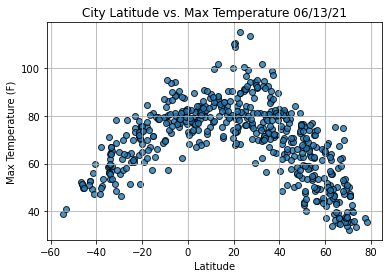

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

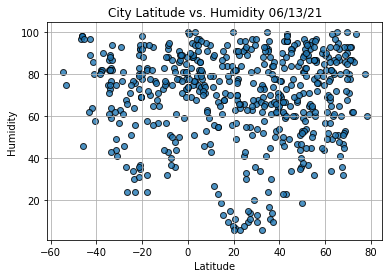

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

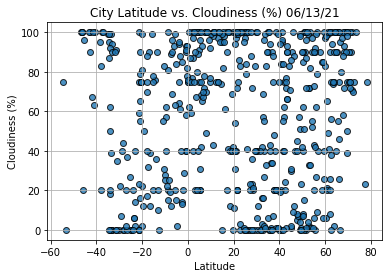

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

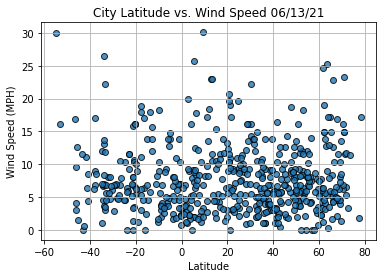

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                  Clyde River
Country                        CA
Date          2021-06-13 16:44:53
Lat                       70.4692
Lng                      -68.5914
Max Temp                    32.23
Humidity                       80
Cloudiness                     90
Wind Speed                  16.11
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-06-13 16:44:48,42.6001,-73.9662,81.14,59,24,5.44
2,Barrow,US,2021-06-13 16:40:02,71.2906,-156.7887,35.62,93,90,11.50
3,Severo-Kurilsk,RU,2021-06-13 16:44:50,50.6789,156.1250,42.87,97,100,16.15
5,Sitka,US,2021-06-13 16:43:56,57.0531,-135.3300,53.49,76,40,0.00
10,Yellowknife,CA,2021-06-13 16:44:52,62.4560,-114.3525,55.92,82,75,14.97


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

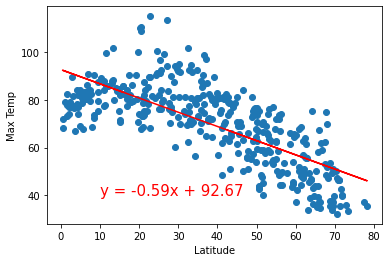

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


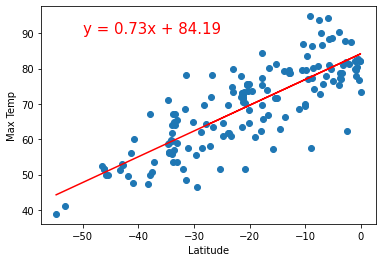

In [25]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

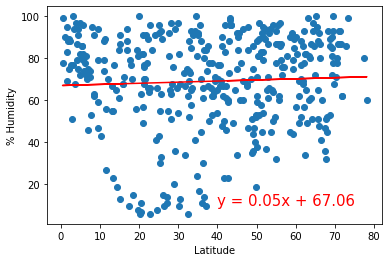

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

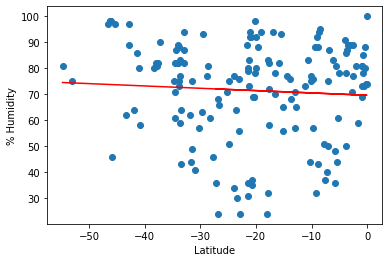

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

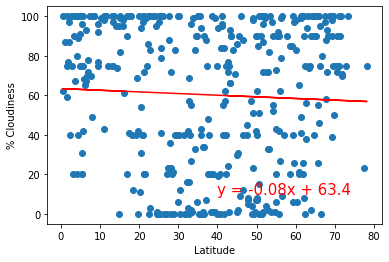

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

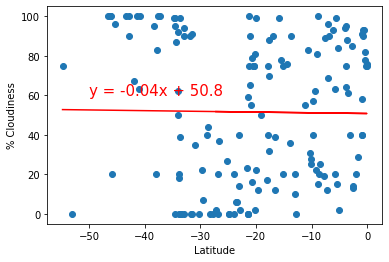

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

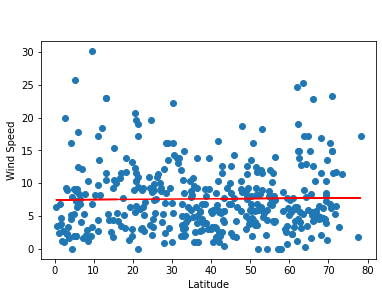

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

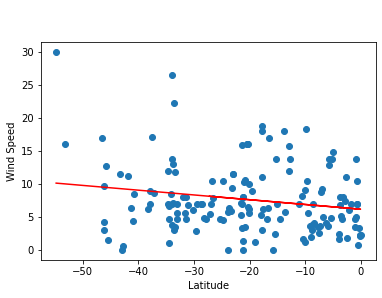

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))